<a href="https://colab.research.google.com/github/BHANAPEESHAN/CNN_Projects_/blob/main/IntelImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
os.environ['KAGGLE_USERNAME']="bhanapeeshan"
os.environ['KAGGLE_KEY']="646853511eaba7e71ae9a0d4d3c4af8a"
!kaggle datasets download -d puneet6060/intel-image-classification

 99% 343M/346M [00:04<00:00, 109MB/s] 
100% 346M/346M [00:04<00:00, 87.4MB/s]


In [2]:
from zipfile import ZipFile
file_name = "/content/intel-image-classification.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('done')

done


In [3]:
import warnings
warnings.filterwarnings('ignore')
data_dir_list=os.listdir("/content/seg_train/seg_train")
print(data_dir_list)
path,dirs,files=next(os.walk("/content/seg_train/seg_train"))
file_count=len(files)

['buildings', 'glacier', 'forest', 'street', 'sea', 'mountain']


In [4]:
# # Creating Train / Val / Test folders (One time use)
import os
import numpy as np
import shutil
import random
#root_dir = '/content/NA_Fish_Dataset/' # data root path
#classes_dir = ['Sea Bass', 'Black Sea Sprat', 'Red Mullet', 'Red Sea Bream', 'Shrimp', 'Striped Red Mullet', 'Trout', 'Gilt Head Bream', 'Horse Mackerel'] #total labels
#
#val_ratio = 0.20
#test_ratio = 0.20
#
#for cls in classes_dir:
#    os.makedirs(root_dir +'train/' + cls)
#    os.makedirs(root_dir +'val/' + cls)
#    os.makedirs(root_dir +'test/' + cls)
#
#
## Creating partitions of the data after shuffeling
#src = root_dir + cls # Folder to copy images from
#
#allFileNames = os.listdir(src)
#np.random.shuffle(allFileNames)
#train_FileNames, val_FileNames, test_FileNames = np.split(np.array(allFileNames),
#                                                          [int(len(allFileNames)* (1 - (val_ratio + test_ratio))), 
#                                                           int(len(allFileNames)* (1 - test_ratio))])
#
#
#train_FileNames = [src+'/'+ name for name in train_FileNames.tolist()]
#val_FileNames = [src+'/' + name for name in val_FileNames.tolist()]
#test_FileNames = [src+'/' + name for name in test_FileNames.tolist()]
#
#print('Total images: ', len(allFileNames))
#print('Training: ', len(train_FileNames))
#print('Validation: ', len(val_FileNames))
#print('Testing: ', len(test_FileNames))
#for cls in classes_dir:
#       # Copy-pasting images
#       for name in train_FileNames:
#              shutil.copy(name, root_dir +'train/' + cls)
#
#       for name in val_FileNames:
#              shutil.copy(name, root_dir +'val/' + cls)
#
#       for name in test_FileNames:
#               shutil.copy(name, root_dir +'test/' + cls)

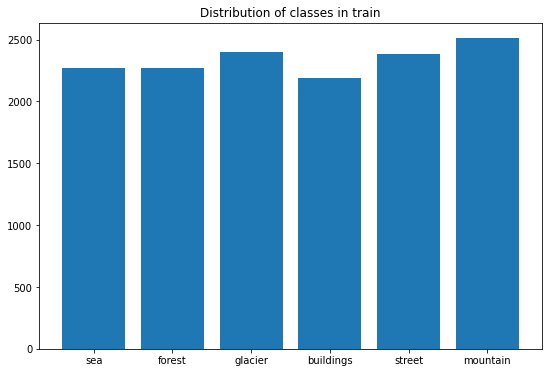

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns 
from matplotlib.image import imread
import pathlib


image_folder=['sea', 'forest', 'glacier', 'buildings', 'street', 'mountain']
nimgs={}

for i in image_folder:
  nimages=len(os.listdir('/content/seg_train/seg_train/'+i+'/'))
  nimgs[i]=nimages
plt.figure(figsize=(9,6))
plt.bar(range(len(nimgs)),list(nimgs.values()),align='center')
plt.xticks(range(len(nimgs)),list(nimgs.keys()))
plt.title("Distribution of classes in train")
plt.show()


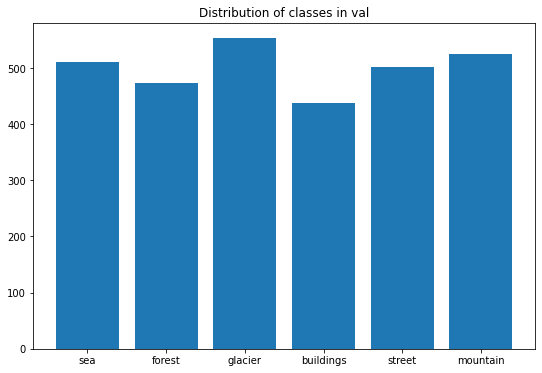

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns 
from matplotlib.image import imread
import pathlib
image_folder=['sea', 'forest', 'glacier', 'buildings', 'street', 'mountain']
nimgs={}

for i in image_folder:
  nimages=len(os.listdir('/content/seg_test/seg_test/'+i+'/'))
  nimgs[i]=nimages
plt.figure(figsize=(9,6))
plt.bar(range(len(nimgs)),list(nimgs.values()),align='center')
plt.xticks(range(len(nimgs)),list(nimgs.keys()))
plt.title("Distribution of classes in val")
plt.show()


In [7]:
for i in image_folder:
  print("training images of {} are: ".format(i)+ str(len(os.listdir("/content/seg_test/seg_test/"+i+"/"))))

training images of sea are: 510
training images of forest are: 474
training images of glacier are: 553
training images of buildings are: 437
training images of street are: 501
training images of mountain are: 525


In [8]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

In [9]:
img_width=256
img_height=256
batch_size=32

In [10]:
TRAINING_DIR = "/content/seg_train/seg_train"
train_datagen=ImageDataGenerator(rescale=1/255.0)
train_gen=train_datagen.flow_from_directory(TRAINING_DIR,
                                            batch_size=batch_size,
                                            class_mode='categorical',
                                            target_size=(img_height,img_width))

Found 14034 images belonging to 6 classes.


In [11]:
VALIDATION_DIR = "/content/seg_test/seg_test"
val_datagen=ImageDataGenerator(rescale=1/255.0)
                                 
val_gen=val_datagen.flow_from_directory(VALIDATION_DIR,
                                            batch_size=batch_size,
                                            class_mode='categorical',
                                            target_size=(img_height,img_width))

Found 3000 images belonging to 6 classes.


In [12]:
callbacks=EarlyStopping(monitor='val_loss',patience=5,verbose=1,mode='auto')    #'auto'
bestmodelfile='/content/CNN_aug_best_weights.h5'
bestmodel=ModelCheckpoint(bestmodelfile,monitor='val_acc',verbose=1,save_best_only=True)

In [13]:
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)), 
    MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'), 
    MaxPooling2D(2, 2),
    Dropout(0.5),
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.5),
    Conv2D(128, (3, 3), activation='relu'),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.5),
    Conv2D(256, (3, 3), activation='relu'),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.5),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(6, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 62, 62, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        1

In [14]:
from tensorflow import optimizers
model.compile(optimizer=optimizers.Adam(learning_rate=0.001), 
              loss='binary_crossentropy', 
              metrics =['accuracy'])

In [15]:
history = model.fit_generator(train_gen,epochs=30,verbose=1,validation_data=val_gen,callbacks=[bestmodel])

Epoch 1/30
439/439 [==============================] - 53s 83ms/step - loss: 0.4032 - accuracy: 0.3093 - val_loss: 0.3045 - val_accuracy: 0.5600
Epoch 2/30
439/439 [==============================] - 38s 87ms/step - loss: 0.2718 - accuracy: 0.6032 - val_loss: 0.2666 - val_accuracy: 0.6180
Epoch 3/30
439/439 [==============================] - 35s 79ms/step - loss: 0.2308 - accuracy: 0.6858 - val_loss: 0.2254 - val_accuracy: 0.7013
Epoch 4/30
439/439 [==============================] - 35s 80ms/step - loss: 0.2073 - accuracy: 0.7269 - val_loss: 0.2254 - val_accuracy: 0.7147
Epoch 5/30
439/439 [==============================] - 34s 77ms/step - loss: 0.1872 - accuracy: 0.7579 - val_loss: 0.2066 - val_accuracy: 0.7487
Epoch 6/30
439/439 [==============================] - 37s 83ms/step - loss: 0.1760 - accuracy: 0.7803 - val_loss: 0.1857 - val_accuracy: 0.7643
Epoch 7/30
439/439 [==============================] - 34s 77ms/step - loss: 0.1681 - accuracy: 0.7920 - val_loss: 0.1746 - val_accuracy:

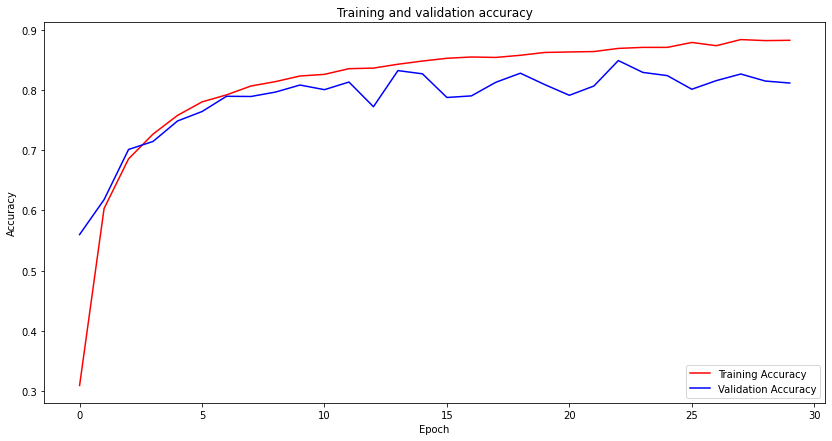

In [16]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss')

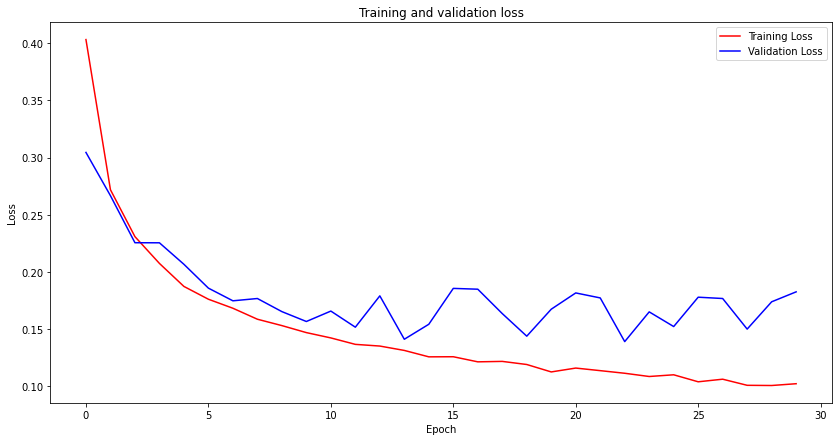

In [17]:
fig2 = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')

In [18]:
import PIL
import os
from PIL import Image

In [19]:
f = r'/content/seg_pred/seg_pred'

In [20]:

for file in os.listdir(f):
    f_img = f+"/"+file
    img = Image.open(f_img)
    img = img.resize((img_height,img_width))
    img.save(f_img)


In [21]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model